### Melakukan proses EDA pada dataset "Housing Price", dengan menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, seperti zona lokasi, jumlah kamar tidur, ukuran tanah, dsb.

# Data Understanding

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut

* `HouseStyle`: Style properti (misal: 1 lantai, 2 lantai, dst)

* `ExterQual`: Kualitas material eksterior
* `SalePrice` : merupakan variabel target yang ingin diprediksi
  * Secara fisik, ini berarti harga properti yang dijual

* `GrLivArea` : berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
  * Satuan yang digunakan adalah *square feet*
* `GarageArea` : berisi informasi mengenai luas garasi (jika ada)
  * Satuan yang digunakan adalah *square feet*






##Tahap 1: Exploratory Data Analysis

1.)Lakukan data preparation, seperti mengimport libraries dan variabel data

2.)Terapkan drop variabel NaN untuk mengeliminasi data NaN

3.)Pisahkan data numerikal dan kategorikal sebelum masuk ke tahap visualisasi

# Data Preparation

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
house = pd.read_csv('/content/drive/MyDrive/Bootcamp/train_house.csv')

In [ ]:
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# cek data null
hitung_null = house.isnull().sum()
persentase_null = (hitung_null / len(house)) * 100

# gabungkan 2 kolom ke 1 data frame
data_hilang = pd.DataFrame({
    'Data_Null': hitung_null,
    'Percentage': persentase_null
})

# Menampilkan jumlah filter data yng bernilai null
data_hilang_filtered = data_hilang[data_hilang['Data_Null'] > 0].sort_values(by='Percentage', ascending=False)
data_hilang_filtered

,Data_Null,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


Terdapat 19 kolom yang berisi data nan, maka kolom yang terdapat nan berjumlah dari 50% akan didrop. Jika data nan lebih dari 50% akan mempengaruhi hasil analisa.

In [ ]:
# Jumlah baris dan kolom sebelum didrop
house.shape

(1460, 81)

In [ ]:
# Drop kolom dengan 50% lebih nilai nan
drop_kol = data_hilang_filtered[data_hilang_filtered['Percentage'] > 50].index
df = house.drop(columns=drop_kol) #hasil drop kolom dimasukan ke variabel df


In [ ]:
# Data setelah drop kolom yang mengandung nan >=50%
df.shape

(1460, 76)

In [ ]:
# cek data null
hitung_nullcl = df.isnull().sum()
persentase_nullcl = (hitung_null / len(df)) * 100

# gabungkan 2 kolom ke 1 data frame
data_hilang = pd.DataFrame({
    'Data_Null': hitung_nullcl,
    'Percentage': persentase_nullcl
})

# Menampilkan jumlah filter data yng bernilai null
data_hilang = data_hilang[data_hilang['Data_Null'] > 0].sort_values(by='Percentage', ascending=False)
data_hilang

,Data_Null,Percentage
FireplaceQu,690.0,47.260274
LotFrontage,259.0,17.739726
GarageCond,81.0,5.547945
GarageFinish,81.0,5.547945
GarageQual,81.0,5.547945
GarageType,81.0,5.547945
GarageYrBlt,81.0,5.547945
BsmtExposure,38.0,2.602740
BsmtFinType2,38.0,2.602740
BsmtCond,37.0,2.534247


Baris pada kolom yang masih terdapat nilai null tidak didrop karena data akan hilang lebih dari 50%

In [ ]:
# Memisahkan data menjadi numerikal & kategorikal

num = df.select_dtypes(include=np.number)
cate = df.select_dtypes(exclude=np.number)
num.shape, cate.shape


((1460, 38), (1460, 38))

In [ ]:
num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
cate

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal


# 1D Visualization



## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut

       AllPub	All public Utilities (E,G,W,& S)
       NoSeWa	Electricity and Gas Only

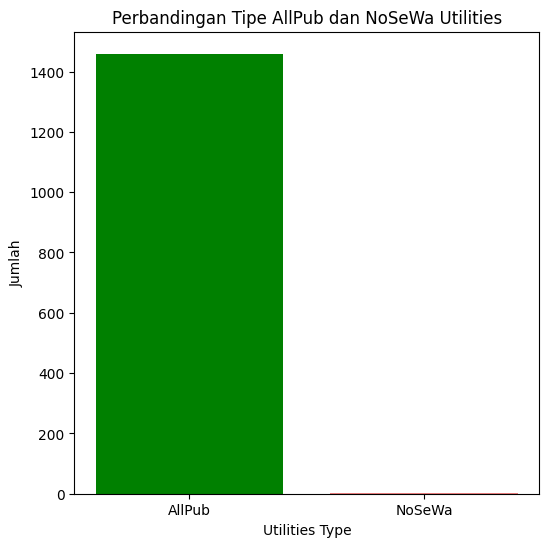

Jumlah properti dengan AllPub utilities: 1459
Jumlah properti dengan NoSeWa utilities: 1


In [ ]:
# membuat visualisasi bar chart utilities allpub dan  NoSeWa

# Plot Utilities
# Analisis Utilities
utilities_counts = df['Utilities'].value_counts()
allpub_count = utilities_counts.get("AllPub", 0)
nosewa_count = utilities_counts.get("NoSeWa", 0)

plt.figure(figsize=(6, 6))
plt.bar(['AllPub', 'NoSeWa'], [allpub_count, nosewa_count], color=['green', 'lightcoral'])
plt.title('Perbandingan Tipe AllPub dan NoSeWa Utilities')
plt.xlabel('Utilities Type')
plt.ylabel('Jumlah')
plt.show()

print(f"Jumlah properti dengan AllPub utilities: {allpub_count}")
print(f"Jumlah properti dengan NoSeWa utilities: {nosewa_count}")

* Tipe utilities yang paling banyak dipilih adalah allpub dengan jumlah data 1459
* Pembeli mementingkan kemudahan dan kenyamanan pelayanan, yang lengkap, dibandingkan fasilitas yang sedikit.
* Menandakan adanya minat yang tinggi untuk pembelian rumah dengan tipe allpub, yang akan menaikan harga rumah tersebut.

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
   

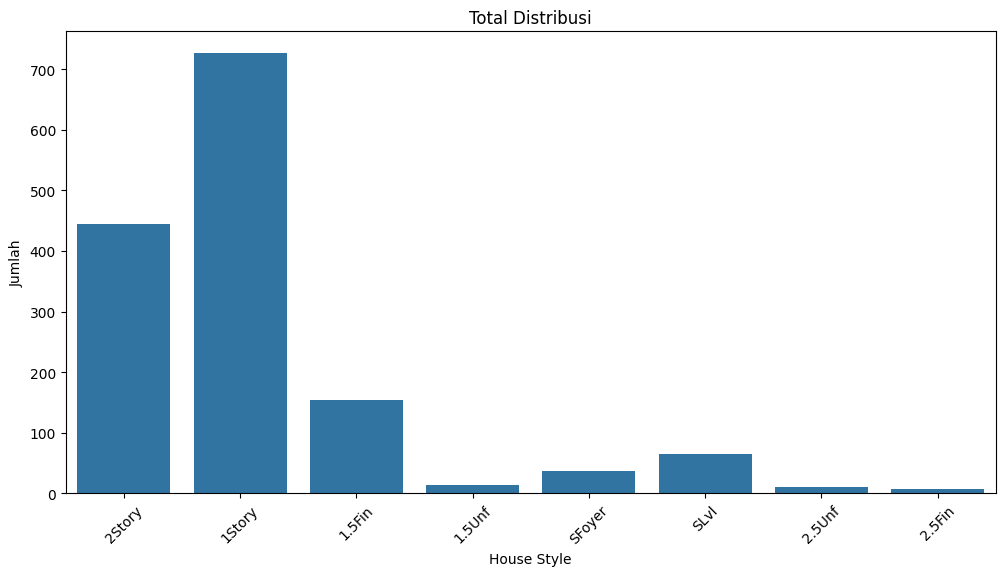

Value Counts:
 HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64


In [ ]:
# visualisasi bar chart HouseStyle

# Plot HouseStyle
plt.figure(figsize=(12, 6))
sns.countplot(x='HouseStyle', data=df)
plt.title('Total Distribusi')
plt.xlabel('House Style')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

# Analisis HouseStyle
housestyle_counts = df['HouseStyle'].value_counts()
print("Value Counts:\n", housestyle_counts)

* Para pembeli lebih menyukai rumah dengan lantai 1 dan 2.
* Pihak pengembang dapat fokus untuk mengembangkan jenis rumah lantai 1 dan 2.
* Dengan dua jenis rumah ini, diharapkan akan banyak diminati oleh pembeli.

### ExterQual

ExterQual: Kualitas material eksterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

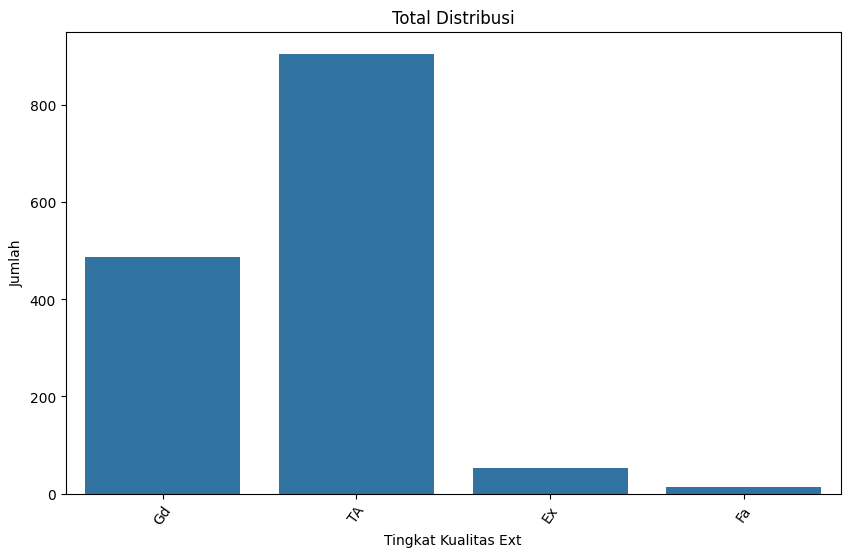

Value Counts:
 ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ExterQual', data=df)
plt.title('Total Distribusi')
plt.xlabel('Tingkat Kualitas Ext')
plt.ylabel('Jumlah')
plt.xticks(rotation=55)
plt.show()

# Analisis HouseStyle
ExterQual_counts = df['ExterQual'].value_counts()
print("Value Counts:\n", ExterQual_counts)

* Pembeli lebih menyukai exterior TA Typical\Average
* Kemungkinan harga exterior TA lebih terjangkau dibanding Gd dan Ex
* Pihak pengembang dapat mempertimbangkan untuk memperbanyak rumah dengan exterior TA, yang dimana harga akan naik karena minat yang tinggi.


## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

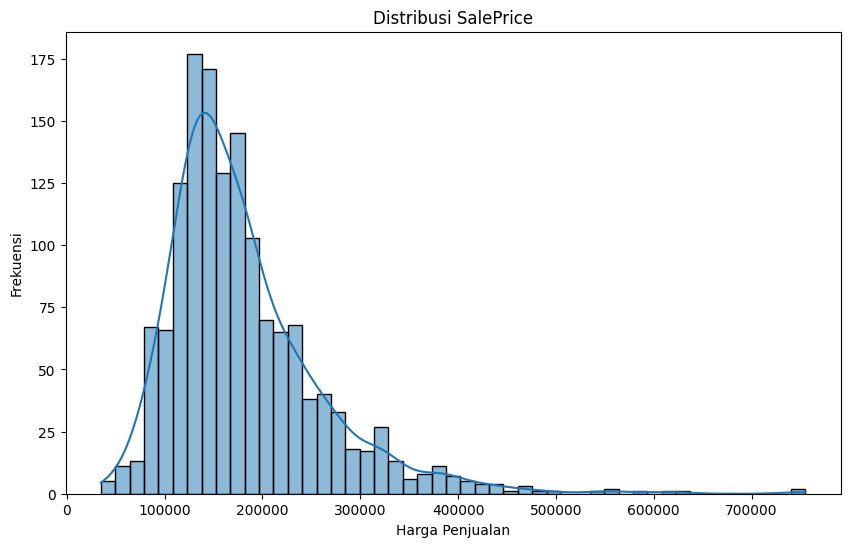

Rata-rata : 180921.19589041095
Median : 163000.0
Standar deviasi : 79442.50288288663


In [ ]:
# Visualisasi jumlah saleprice

# Plot SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribusi SalePrice')
plt.xlabel('Harga Penjualan')
plt.ylabel('Frekuensi')
plt.show()

# Analisis SalePrice
print(f"Rata-rata : {df['SalePrice'].mean()}")
print(f"Median : {df['SalePrice'].median()}")
print(f"Standar deviasi : {df['SalePrice'].std()}")

* Properti yang terjual yang dominan, berkisar antara 100,000 sampai 200,000

* Dengan rentang 100-200 ribu harga properti tersebut dapat dijangkau oleh sebagian besar kelas menengah

* Pada visualisasi tersebut didapatkan bahwa SalePrice tidak terdistribusi dengan normal dengan skew ke kanan, disebabkan mean lebih besar dibandingkan median.

* Dapat dilakukan tranformasi nantinya, agar terdistribusi normal

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

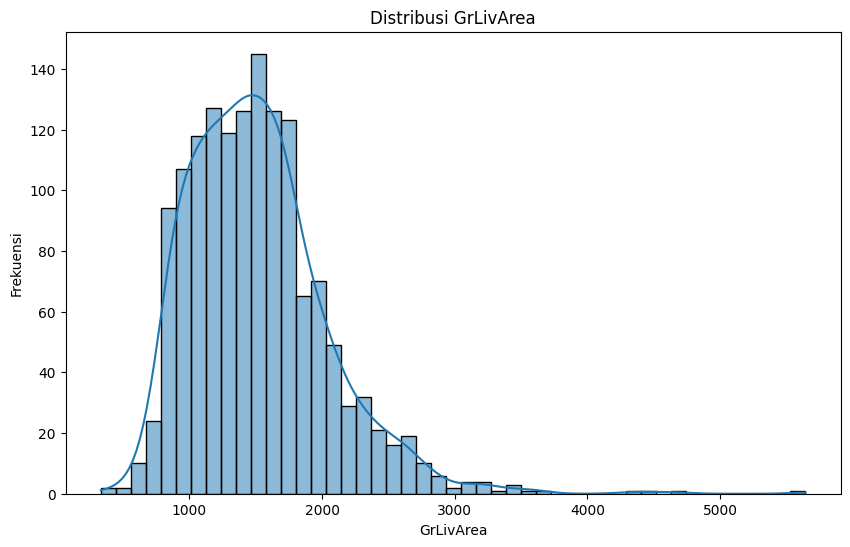

Rata-rata : 1515.463698630137
Median : 1464.0
Standar deviasi : 525.4803834232027


In [ ]:
# Visualisasi jumlah GrLivArea

# Plot GrLivArea
plt.figure(figsize=(10, 6))
sns.histplot(df['GrLivArea'], kde=True)
plt.title('Distribusi GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Frekuensi')
plt.show()

# Analisis GrLivArea
print(f"Rata-rata : {df['GrLivArea'].mean()}")
print(f"Median : {df['GrLivArea'].median()}")
print(f"Standar deviasi : {df['GrLivArea'].std()}")

* Luas area yang dominan dipilih adalah dari rentang 1000-2000 sqrft.
* Kemungkinan rumiah yang dihuni memiliki jumlah anggota keluarga menengah, serta pendapatan menengah.
* Luas area tersebut lebih terjangkau dibandingkan area yang lebih luas.
* Pada visualisasi tersebut terlihat bahwa skew ke kanan, menyebabkan data tidak terdistribusi dengan normal. Maka perlu adanya transformasi data.

### GarageArea
* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*



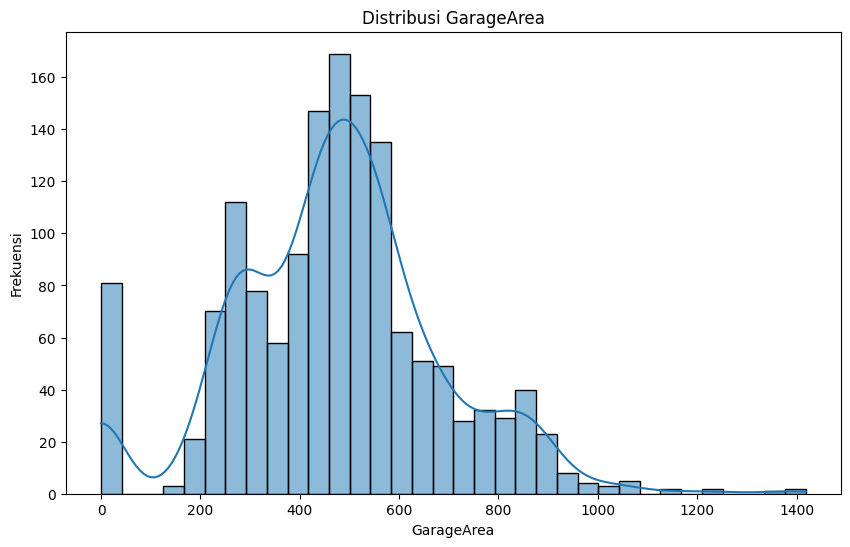

Rata-rata : 472.9801369863014
Median : 480.0
Standar deviasi : 213.80484145338076


In [ ]:
# Visualisasi jumlah GarageArea

# Plot GarageArea
plt.figure(figsize=(10, 6))
sns.histplot(df['GarageArea'], kde=True)
plt.title('Distribusi GarageArea')
plt.xlabel('GarageArea')
plt.ylabel('Frekuensi')
plt.show()

# Analisis GrLivArea
print(f"Rata-rata : {df['GarageArea'].mean()}")
print(f"Median : {df['GarageArea'].median()}")
print(f"Standar deviasi : {df['GarageArea'].std()}")

* Luas area garasi yang dominan dipilih adalah 240 - 600 sqrft
* Pembeli lebih banyak memilih luas garasi yang standar atau pas, yang sesuai dengan kebutuhan mereka.
* Pada visualisasi tersebut data terdistribusi secara normal tanpa skew ke kanan atau kiri, namun terdapat data yang bernilai nol/null. Kemungkinan data yang dimasukan null karena properti tidak memiliki garasi.
*  Untuk data yang bernilai noll akan didrop.


## Pemrosesan Data Variabel Numerikal

### SalePrice

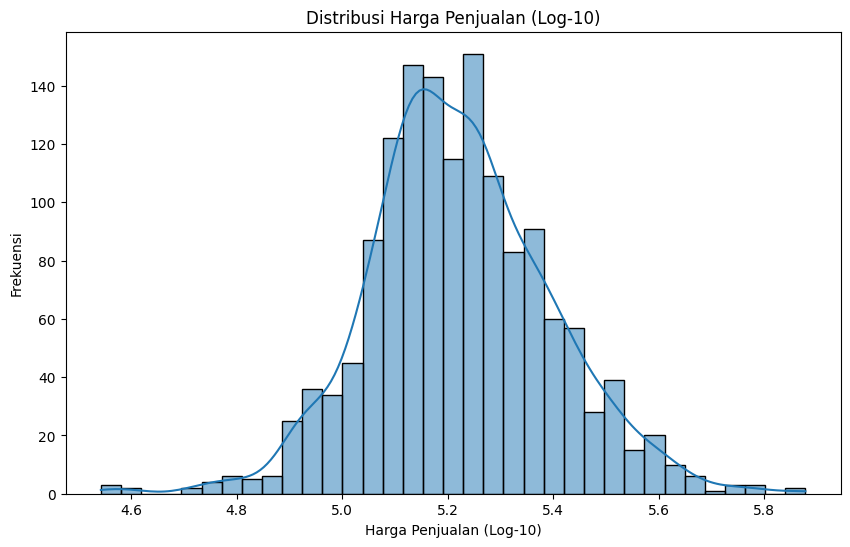

Rata-rata (Log-10): 5.221978956475628
Median (Log-10): 5.212187604403958
Standar deviasi (Log-10): 0.17347974217176843


In [ ]:
# Transformasi log-10 SalePrice
df['SalePrice_tf'] = np.log10(df['SalePrice'])

# Plot SalePrice setelah transformasi
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice_tf'], kde=True)
plt.title('Distribusi Harga Penjualan (Log-10)')
plt.xlabel('Harga Penjualan (Log-10)')
plt.ylabel('Frekuensi')
plt.show()

# Analisis SalePrice setelah transformasi
print(f"Rata-rata (Log-10): {df['SalePrice_tf'].mean()}")
print(f"Median (Log-10): {df['SalePrice_tf'].median()}")
print(f"Standar deviasi (Log-10): {df['SalePrice_tf'].std()}")

Setelah melakukan transformasi dengan log maka data terdistribusi dengan normal.

### Transformasi log-10 GrLivArea

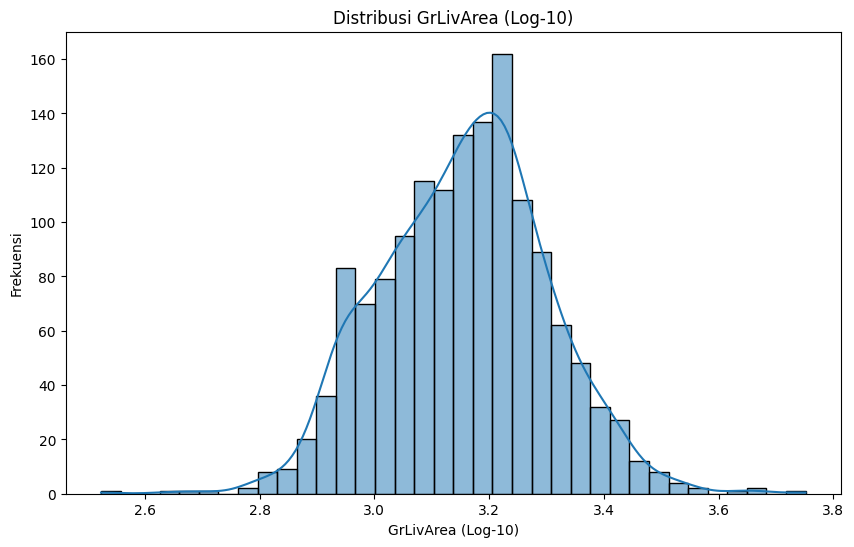

Rata-rata (Log-10): 3.156354310389778
Median (Log-10): 3.165541076722373
Standar deviasi (Log-10): 0.1448591086966387


In [ ]:
# Transformasi log-10 GrLivArea
df['GrLivArea_tf'] = np.log10(df['GrLivArea'])

# Plot GrLivArea setelah transformasi
plt.figure(figsize=(10, 6))
sns.histplot(df['GrLivArea_tf'], kde=True)
plt.title('Distribusi GrLivArea (Log-10)')
plt.xlabel('GrLivArea (Log-10)')
plt.ylabel('Frekuensi')
plt.show()

# Analisis GrLivArea setelah transformasi
print(f"Rata-rata (Log-10): {df['GrLivArea_tf'].mean()}")
print(f"Median (Log-10): {df['GrLivArea_tf'].median()}")
print(f"Standar deviasi (Log-10): {df['GrLivArea_tf'].std()}")

Setelah melakukan transformasi dengan log maka data terdistribusi dengan normal.

### Menghilangkan nilai nol pada GarageArea

In [ ]:
# Menghapus nilai 0 pada GarageArea

# Drop baris 'GarageArea' = 0
df = df[df['GarageArea'] != 0]

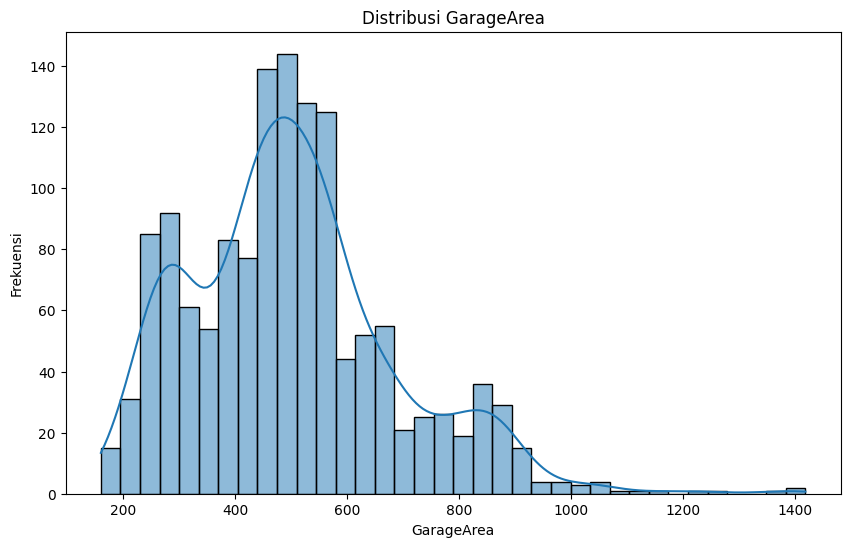

Rata-rata : 500.76214648295866
Median : 484.0
Standar deviasi : 185.68051979433156


In [ ]:
# Visualisasi jumlah GarageArea

# Plot GarageArea
plt.figure(figsize=(10, 6))
sns.histplot(df['GarageArea'], kde=True)
plt.title('Distribusi GarageArea')
plt.xlabel('GarageArea')
plt.ylabel('Frekuensi')
plt.show()

# Analisis GrLivArea
print(f"Rata-rata : {df['GarageArea'].mean()}")
print(f"Median : {df['GarageArea'].median()}")
print(f"Standar deviasi : {df['GarageArea'].std()}")

Data yang bernilai null telah didrop.

# 2D Visualization

## Hubungan GrLivArea dengan SalePrice

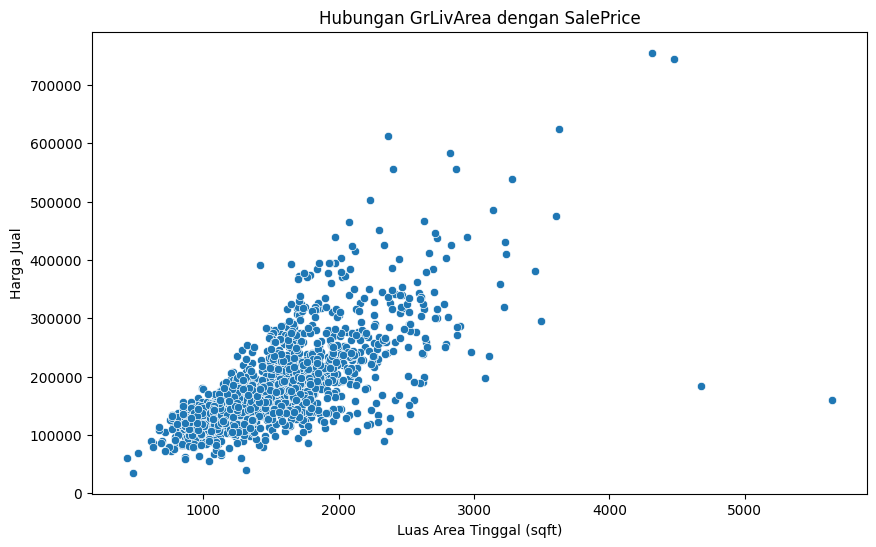

In [ ]:
# Visualisasi hubungan GrLivArea dengan SalePrice

plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Hubungan GrLivArea dengan SalePrice')
plt.xlabel('Luas Area Tinggal (sqft)')
plt.ylabel('Harga Jual')
plt.show()

* Terdapat hubungan antara GrLivArea dengan SalePrice, dimana persebaran data semakin naik.
* Semakin luas area tinggal maka semakin mahal.
* Namun terdapat outlier luas area dari rentang 4800 -  lebih dari 5000 yang harganya murah, kemungkinan disebabkan variabel lain seperti fasilitas maupun jumlah lantai, dll. Menyebabkan harga, luas area tinggal dalam rentang tersebut murah.

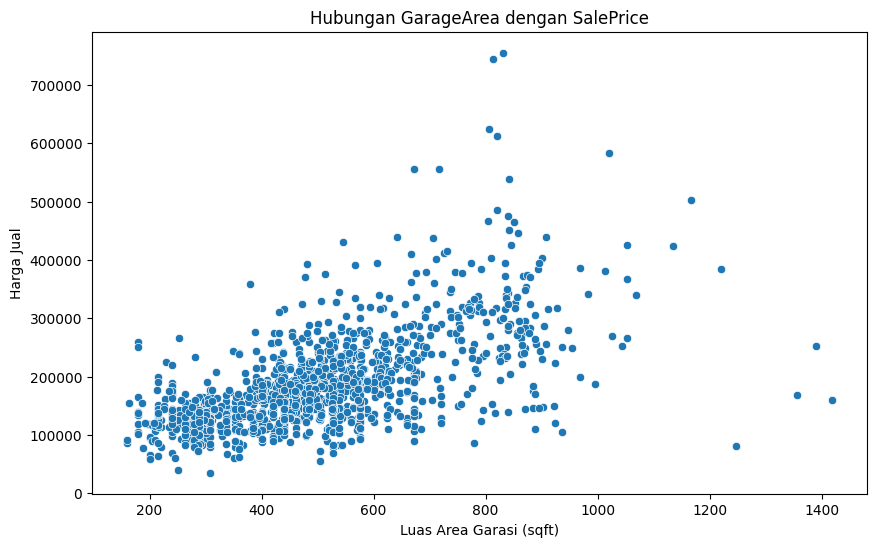

In [ ]:
# Visualisasi hubungan GarageArea dengan SalePrice

plt.figure(figsize=(10, 6))
sns.scatterplot(x='GarageArea', y='SalePrice', data=df)
plt.title('Hubungan GarageArea dengan SalePrice')
plt.xlabel('Luas Area Garasi (sqft)')
plt.ylabel('Harga Jual')
plt.show()

* Terdapat hubungan antara GarageArea dengan SalePrice, dimana persebaran data semakin naik.
* Semakin luas garasi maka semakin mahal.
* Namun terdapat outlier luas area garasi dari rentang 1200 -  lebih dari 1400 yang harganya murah, kemungkinan disebabkan variabel lain seperti fasilitas, luas area tinggal, maupun jumlah lantai, dll. Menyebabkan harga, luas area garasi dalam rentang tersebut murah.